# Creating a NN without using TF/PT for the understanding of its working

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("train.csv")


In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

Y_train


array([6, 1, 5, ..., 4, 7, 9], dtype=int64)

### when working with the MNIST dataset, each 28x28 pixel grayscale image is flattened to a vector of 784 values (from index 0 to 783) as the input layer, with each value representing one pixel

## Forward and backward propagation
1) Forward prop: defining the first time execution of the layers
2) Backward prop: Repeating to run it over and over again

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2


# Here W is the weight and b is the bias
def ReLU(Z):
    return np.maximum(Z, 0)

# Here A acts as our input layer of the neural network (the first layer from 0 to 784 (28*28))
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


# if a function is not applied then the second layer is the liner combination of the first layer and the first layer is the
# liner combination of the input layer.
def forward_prop(W1, b1, W2, b2, X):
# Here Z1 is the unactivated first layer of the neural network (the intermediate layer from 0 to 10)
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1) # Rectified linear unit, changes the linearlity to tangent and sine
# Here Z2 is the unactivated second layer
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2) # softmax activation function gives us the probability of a digit
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
# dz2 is the representation of the error produced by the second layer
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
# db2 is the average of the error
# repeating for the first layer
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
# after finding out how much each error contributes
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[2 4 7 ... 2 4 4] [6 1 5 ... 4 7 9]
0.10495121951219512
Iteration:  10
[0 3 7 ... 5 3 1] [6 1 5 ... 4 7 9]
0.2137560975609756
Iteration:  20
[0 1 7 ... 5 7 1] [6 1 5 ... 4 7 9]
0.3102682926829268
Iteration:  30
[6 1 7 ... 5 7 1] [6 1 5 ... 4 7 9]
0.3858780487804878
Iteration:  40
[6 1 7 ... 0 7 1] [6 1 5 ... 4 7 9]
0.4438780487804878
Iteration:  50
[6 1 8 ... 0 7 4] [6 1 5 ... 4 7 9]
0.4872439024390244
Iteration:  60
[6 1 8 ... 8 7 4] [6 1 5 ... 4 7 9]
0.5300243902439025
Iteration:  70
[6 1 0 ... 8 7 9] [6 1 5 ... 4 7 9]
0.5684390243902439
Iteration:  80
[6 1 0 ... 8 7 9] [6 1 5 ... 4 7 9]
0.5994634146341463
Iteration:  90
[6 1 0 ... 9 9 9] [6 1 5 ... 4 7 9]
0.6244878048780488
Iteration:  100
[6 1 0 ... 9 9 9] [6 1 5 ... 4 7 9]
0.6464878048780488
Iteration:  110
[6 1 0 ... 9 9 9] [6 1 5 ... 4 7 9]
0.6639024390243903
Iteration:  120
[6 1 0 ... 9 9 9] [6 1 5 ... 4 7 9]
0.6803414634146342
Iteration:  130
[6 1 0 ... 9 9 9] [6 1 5 ... 4 7 9]
0.6956097560975609
Iteration:  140


### 85% accuracy on the training set

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

## Testing the neural network

Prediction:  [6]
Label:  6


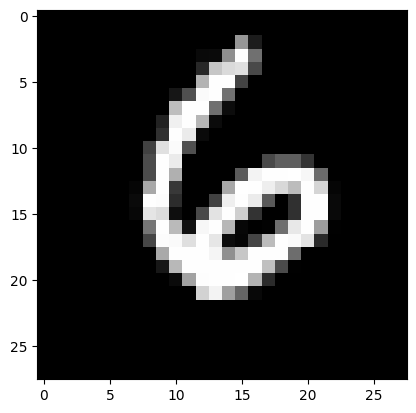

Prediction:  [1]
Label:  1


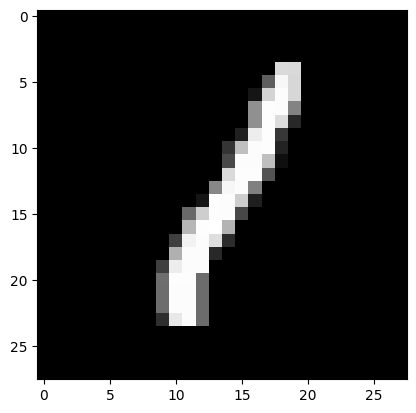

Prediction:  [5]
Label:  5


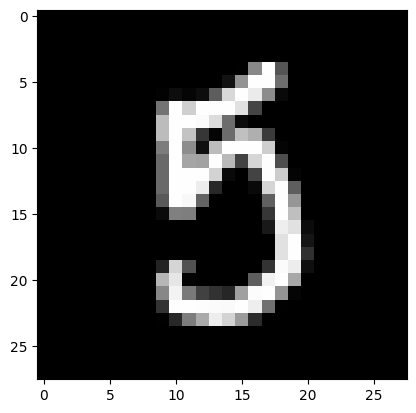

Prediction:  [6]
Label:  6


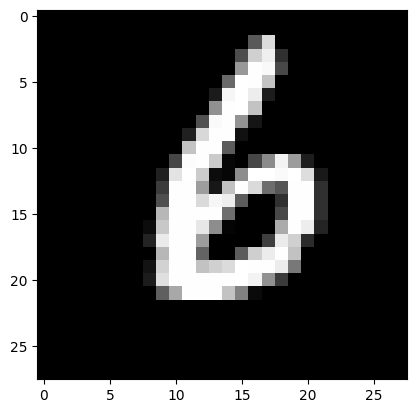

In [11]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)